# Data Exploration

In [1]:
train_images = '_Inputs/strawberry/train/images'
train_labels = '_Inputs/strawberry/train/labels'

val_images = '_Inputs/strawberry/valid/images'
val_labels = '_Inputs/strawberry/valid/labels'

test_images = '_Inputs/strawberry/test/images'
test_labels = '_Inputs/strawberry/test/labels'

import os

print('Number of train frames: ' + str(len(os.listdir(train_images))))
print('Number of train labels: ' + str(len(os.listdir(train_labels))))
print('Number of val frames: ' + str(len(os.listdir(val_images))))
print('Number of val labels: ' + str(len(os.listdir(val_labels))))
print('Number of test frames: ' + str(len(os.listdir(test_images))))
print('Number of test labels: ' + str(len(os.listdir(test_labels))))
print('Total frames: ' + str(len(os.listdir(train_images)) + len(os.listdir(val_images)) + len(os.listdir(test_images))))

Number of train frames: 33
Number of train labels: 33
Number of val frames: 4
Number of val labels: 4
Number of test frames: 4
Number of test labels: 4
Total frames: 41


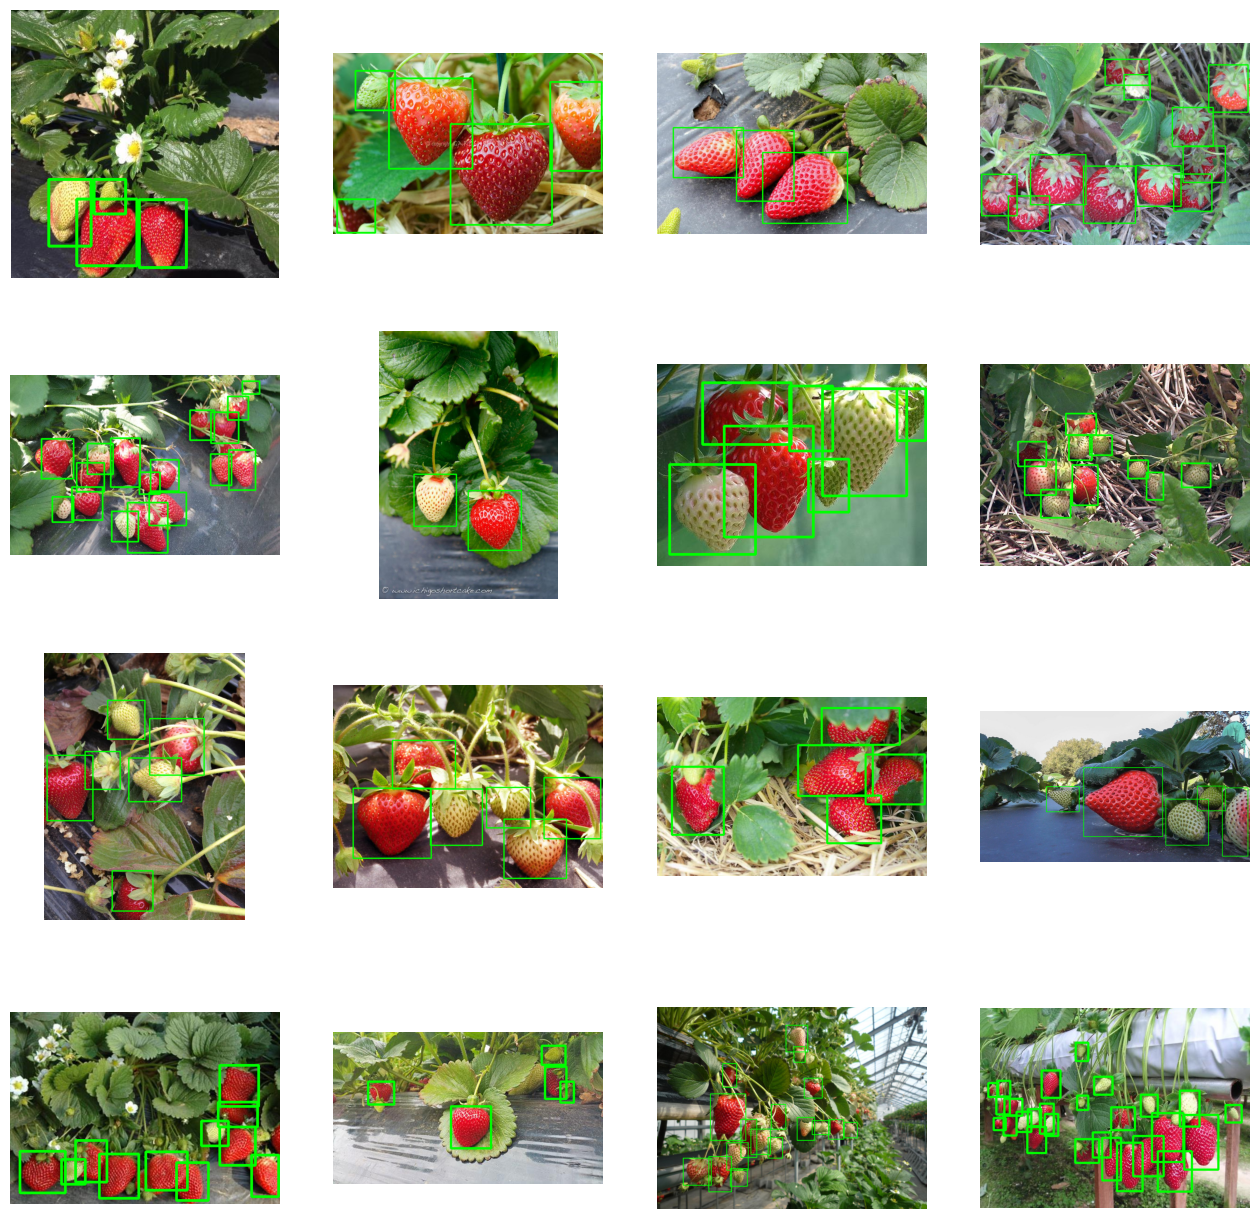

In [2]:
import random
import matplotlib.pyplot as plt
import cv2
# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [3]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 dataset for 100 epochs
model.train(
    data="_Inputs/strawberry/data.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    device="cpu",  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

Ultralytics 8.3.140  Python-3.12.9 torch-2.7.0+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=_Inputs/strawberry/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

train: Scanning C:\Users\chun\Desktop\_Git\VEnv_YOLO\_Inputs\strawberry\train\labels.cache... 33 images, 0 backgrounds,

val: Fast image access  (ping: 0.10.0 ms, read: 452.4128.0 MB/s, size: 174.3 KB)



C:\Users\chun\Desktop\_Git\VEnv_YOLO\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\chun\Desktop\_Git\VEnv_YOLO\_Inputs\strawberry\valid\labels.cache... 4 images, 0 backgrounds, 0 
C:\Users\chun\Desktop\_Git\VEnv_YOLO\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.451      3.256      1.487         16        640: 100%|██████████| 3/3 [00:09<00:00,  3.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42     0.0317      0.905      0.196      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G       1.21      3.077      1.357         13        640: 100%|██████████| 3/3 [00:10<00:00,  3.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42     0.0325      0.929      0.292      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.101       2.77      1.234          9        640: 100%|██████████| 3/3 [00:12<00:00,  4.00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.035          1      0.408      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.225       2.51      1.227          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.035          1       0.66        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G       1.24      2.292      1.133         12        640: 100%|██████████| 3/3 [00:11<00:00,  3.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.035          1      0.774      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.232      1.944      1.111          7        640: 100%|██████████| 3/3 [00:10<00:00,  3.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.035          1      0.752      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.255      1.878      1.116         11        640: 100%|██████████| 3/3 [00:11<00:00,  3.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.035          1      0.754      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.154      1.797      1.139         33        640: 100%|██████████| 3/3 [00:11<00:00,  3.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.035          1      0.769       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      0.971      1.535      1.055          3        640: 100%|██████████| 3/3 [00:10<00:00,  3.61
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.978      0.429      0.717      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.129      1.336      1.115         17        640: 100%|██████████| 3/3 [00:11<00:00,  3.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42          1      0.302      0.675      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.194      1.392      1.156          9        640: 100%|██████████| 3/3 [00:10<00:00,  3.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42          1      0.395      0.675      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.204      1.213      1.158         31        640: 100%|██████████| 3/3 [00:10<00:00,  3.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.945      0.413      0.682      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.363       1.44       1.33          7        640: 100%|██████████| 3/3 [00:10<00:00,  3.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42        0.8      0.452      0.721      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.147       1.07      1.145         28        640: 100%|██████████| 3/3 [00:11<00:00,  3.71
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.842      0.509      0.727      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.244      1.067      1.281          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.793      0.524      0.706      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.008      1.235      1.098          5        640: 100%|██████████| 3/3 [00:11<00:00,  3.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.937      0.429      0.654       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.039      1.154      1.148          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.827      0.568      0.721      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.092      1.028      1.101         18        640: 100%|██████████| 3/3 [00:10<00:00,  3.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.894      0.601      0.787      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.9388       1.31      1.087          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.896      0.643      0.788      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.035     0.9373      1.059         19        640: 100%|██████████| 3/3 [00:09<00:00,  3.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.873      0.654      0.805      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.014     0.8976      1.075         17        640: 100%|██████████| 3/3 [00:08<00:00,  2.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.916      0.786        0.9       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.058     0.9177       1.11         13        640: 100%|██████████| 3/3 [00:08<00:00,  2.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.896      0.819      0.909      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.404      1.281      1.299          6        640: 100%|██████████| 3/3 [00:11<00:00,  3.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.798      0.751      0.853      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.186      1.137      1.097         49        640: 100%|██████████| 3/3 [00:11<00:00,  3.87
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.858      0.722      0.889      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.047     0.9344      1.052         24        640: 100%|██████████| 3/3 [00:10<00:00,  3.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.889      0.764      0.917      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.9213     0.9898      1.045          6        640: 100%|██████████| 3/3 [00:10<00:00,  3.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.943      0.788      0.907      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.9848     0.9037      1.053          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.946      0.837      0.913      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      0.962      1.289      1.065          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.922      0.845      0.923      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.109     0.9421      1.188          8        640: 100%|██████████| 3/3 [00:10<00:00,  3.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.922      0.845      0.923      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.107      2.679      1.213          2        640: 100%|██████████| 3/3 [00:10<00:00,  3.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.917      0.794      0.925      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.033      1.009      1.039         27        640: 100%|██████████| 3/3 [00:10<00:00,  3.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.894      0.799      0.921      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.9331     0.8065      1.027         20        640: 100%|██████████| 3/3 [00:10<00:00,  3.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.833       0.81      0.932      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.132      1.019       1.24          9        640: 100%|██████████| 3/3 [00:10<00:00,  3.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.833       0.81      0.932      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.309     0.9587      1.161         27        640: 100%|██████████| 3/3 [00:10<00:00,  3.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.854      0.881       0.95      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.118      1.078      1.245          6        640: 100%|██████████| 3/3 [00:09<00:00,  3.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.883      0.898      0.966      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.9659     0.8382      1.047         16        640: 100%|██████████| 3/3 [00:09<00:00,  3.21
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.901      0.864      0.964      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.9593     0.9482      1.026          6        640: 100%|██████████| 3/3 [00:11<00:00,  3.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.901      0.864      0.964      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.8933     0.9901       1.07          4        640: 100%|██████████| 3/3 [00:10<00:00,  3.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.863      0.902      0.967      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.9302     0.8417       1.03          9        640: 100%|██████████| 3/3 [00:11<00:00,  3.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.849      0.936      0.975      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.8587     0.7894      1.048         10        640: 100%|██████████| 3/3 [00:11<00:00,  3.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.966      0.857      0.972      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G       1.06     0.8908      1.092         26        640: 100%|██████████| 3/3 [00:11<00:00,  3.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.966      0.857      0.972      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.063     0.8518      1.121         12        640: 100%|██████████| 3/3 [00:11<00:00,  3.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.867      0.931      0.966      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.9015     0.9493     0.9675          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.927      0.904       0.96      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.8398     0.8324      1.046          5        640: 100%|██████████| 3/3 [00:11<00:00,  3.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.886      0.924       0.96      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      1.048     0.9448       1.17          5        640: 100%|██████████| 3/3 [00:10<00:00,  3.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.886      0.924       0.96      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.9445     0.7733      1.021         16        640: 100%|██████████| 3/3 [00:10<00:00,  3.50
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.922      0.929      0.963      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.033     0.8368      1.046         37        640: 100%|██████████| 3/3 [00:10<00:00,  3.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.927      0.903      0.965      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.9846      0.806       1.03         27        640: 100%|██████████| 3/3 [00:11<00:00,  3.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.906      0.857      0.967      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.9078     0.7077      1.024         14        640: 100%|██████████| 3/3 [00:10<00:00,  3.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.906      0.857      0.967      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.8766      1.682      1.011          2        640: 100%|██████████| 3/3 [00:11<00:00,  3.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.894      0.833       0.95       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.9345     0.7063      1.036         14        640: 100%|██████████| 3/3 [00:10<00:00,  3.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.944      0.802      0.948      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.055     0.8151      1.154          9        640: 100%|██████████| 3/3 [00:09<00:00,  3.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.967      0.833      0.955       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.9429     0.7602      1.023         22        640: 100%|██████████| 3/3 [00:09<00:00,  3.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.967      0.833      0.955       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.8047     0.7707     0.9766          8        640: 100%|██████████| 3/3 [00:09<00:00,  3.08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.963      0.833      0.953      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.8258     0.6713     0.9592         18        640: 100%|██████████| 3/3 [00:08<00:00,  2.98
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.938      0.857      0.956      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.8861     0.8815      1.056          8        640: 100%|██████████| 3/3 [00:10<00:00,  3.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.885      0.918      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.8378     0.8948      1.026         11        640: 100%|██████████| 3/3 [00:10<00:00,  3.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.885      0.918      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.058     0.9192      1.038         34        640: 100%|██████████| 3/3 [00:10<00:00,  3.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.949      0.878      0.965      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.9162     0.6992      1.032         16        640: 100%|██████████| 3/3 [00:11<00:00,  3.75
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.973      0.857      0.965      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.7113     0.7344     0.9744          7        640: 100%|██████████| 3/3 [00:11<00:00,  3.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.969      0.881      0.973      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.8305     0.6458      1.027         13        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.969      0.881      0.973      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.9307     0.7529      1.021         13        640: 100%|██████████| 3/3 [00:11<00:00,  3.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.923      0.905      0.965      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.8152     0.6934     0.9755         19        640: 100%|██████████| 3/3 [00:11<00:00,  3.85
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.941      0.881      0.962      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.8401     0.7568     0.9992         10        640: 100%|██████████| 3/3 [00:11<00:00,  3.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42       0.99      0.857      0.956      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.8003     0.6879     0.9527         28        640: 100%|██████████| 3/3 [00:12<00:00,  4.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42       0.99      0.857      0.956      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.7783     0.6305     0.9766         19        640: 100%|██████████| 3/3 [00:11<00:00,  3.94
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.965      0.857      0.949      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.7816     0.6906     0.9801         17        640: 100%|██████████| 3/3 [00:11<00:00,  3.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.948      0.863      0.946       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.7755     0.6193     0.9661         16        640: 100%|██████████| 3/3 [00:11<00:00,  3.77
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42          1      0.808      0.933      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.6783     0.7529     0.9231          4        640: 100%|██████████| 3/3 [00:10<00:00,  3.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42          1      0.808      0.933      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.9512     0.8366      1.072          7        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.947      0.856      0.935      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.8233     0.6575     0.9959         12        640: 100%|██████████| 3/3 [00:10<00:00,  3.55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.947      0.855      0.933        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.7251     0.5948     0.9592         13        640: 100%|██████████| 3/3 [00:11<00:00,  3.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.937      0.833      0.929      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.7663     0.6673     0.9642         26        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.937      0.833      0.929      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.7406     0.5911     0.9325         21        640: 100%|██████████| 3/3 [00:10<00:00,  3.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.899      0.857      0.927      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      0.798     0.6809     0.9516         28        640: 100%|██████████| 3/3 [00:11<00:00,  3.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.892      0.857      0.924      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.8716     0.9494      1.085          5        640: 100%|██████████| 3/3 [00:10<00:00,  3.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.896      0.857      0.924      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.8864      0.758      1.106          7        640: 100%|██████████| 3/3 [00:10<00:00,  3.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.896      0.857      0.924      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.7646     0.7212     0.9756          9        640: 100%|██████████| 3/3 [00:11<00:00,  3.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42       0.88      0.873      0.925      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.7071     0.6701     0.9785         21        640: 100%|██████████| 3/3 [00:10<00:00,  3.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.911      0.857      0.931      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.7775      0.735       1.01          9        640: 100%|██████████| 3/3 [00:11<00:00,  3.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.908      0.881      0.926      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.7135     0.7404     0.9404          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.908      0.881      0.926      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.7222     0.6149     0.9289         13        640: 100%|██████████| 3/3 [00:11<00:00,  3.84
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.921      0.881       0.93      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      0.804      0.657     0.9245         24        640: 100%|██████████| 3/3 [00:11<00:00,  3.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.879      0.881       0.94      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.8226     0.8575      1.106          6        640: 100%|██████████| 3/3 [00:10<00:00,  3.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.878      0.881      0.943      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.6606     0.5794     0.9326          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.878      0.881      0.943      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.7178     0.5485     0.9224         10        640: 100%|██████████| 3/3 [00:10<00:00,  3.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.902      0.879      0.944       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.7267     0.6031     0.9586         11        640: 100%|██████████| 3/3 [00:10<00:00,  3.59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.902      0.875      0.951       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.6771     0.6042     0.9066          8        640: 100%|██████████| 3/3 [00:10<00:00,  3.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.852      0.929      0.953      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.7199     0.7065      0.975          6        640: 100%|██████████| 3/3 [00:10<00:00,  3.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.852      0.929      0.953      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.7142     0.5795     0.9522         17        640: 100%|██████████| 3/3 [00:10<00:00,  3.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.849      0.934      0.961       0.65


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


C:\Users\chun\Desktop\_Git\VEnv_YOLO\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
     91/100         0G     0.6356      1.003      0.876          2        640: 100%|██████████| 3/3 [00:11<00:00,  3.75
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.938      0.857      0.964      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.6184      1.016     0.8647          2        640: 100%|██████████| 3/3 [00:11<00:00,  3.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.945      0.857      0.967      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.8603     0.7358      1.019          6        640: 100%|██████████| 3/3 [00:10<00:00,  3.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.945      0.857      0.967      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.7116     0.7163       0.94          6        640: 100%|██████████| 3/3 [00:11<00:00,  3.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.971      0.857      0.964      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.5442     0.8374     0.8951          2        640: 100%|██████████| 3/3 [00:10<00:00,  3.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.966      0.857      0.952      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.6309      0.612     0.8525          5        640: 100%|██████████| 3/3 [00:11<00:00,  3.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.949      0.878      0.936       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.6815      0.598     0.8575         11        640: 100%|██████████| 3/3 [00:10<00:00,  3.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.949      0.878      0.936       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.5948     0.6042     0.8586          6        640: 100%|██████████| 3/3 [00:10<00:00,  3.40
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.938      0.881      0.931      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.5554     0.7562     0.8711          2        640: 100%|██████████| 3/3 [00:10<00:00,  3.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.928      0.881      0.934      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.7053     0.7319     0.9783          5        640: 100%|██████████| 3/3 [00:11<00:00,  3.72
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all          4         42      0.917      0.905      0.938      0.673



100 epochs completed in 0.321 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 5.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.140  Python-3.12.9 torch-2.7.0+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         42      0.972      0.857      0.963      0.685
Speed: 2.1ms preprocess, 68.8ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000012F3292D7F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

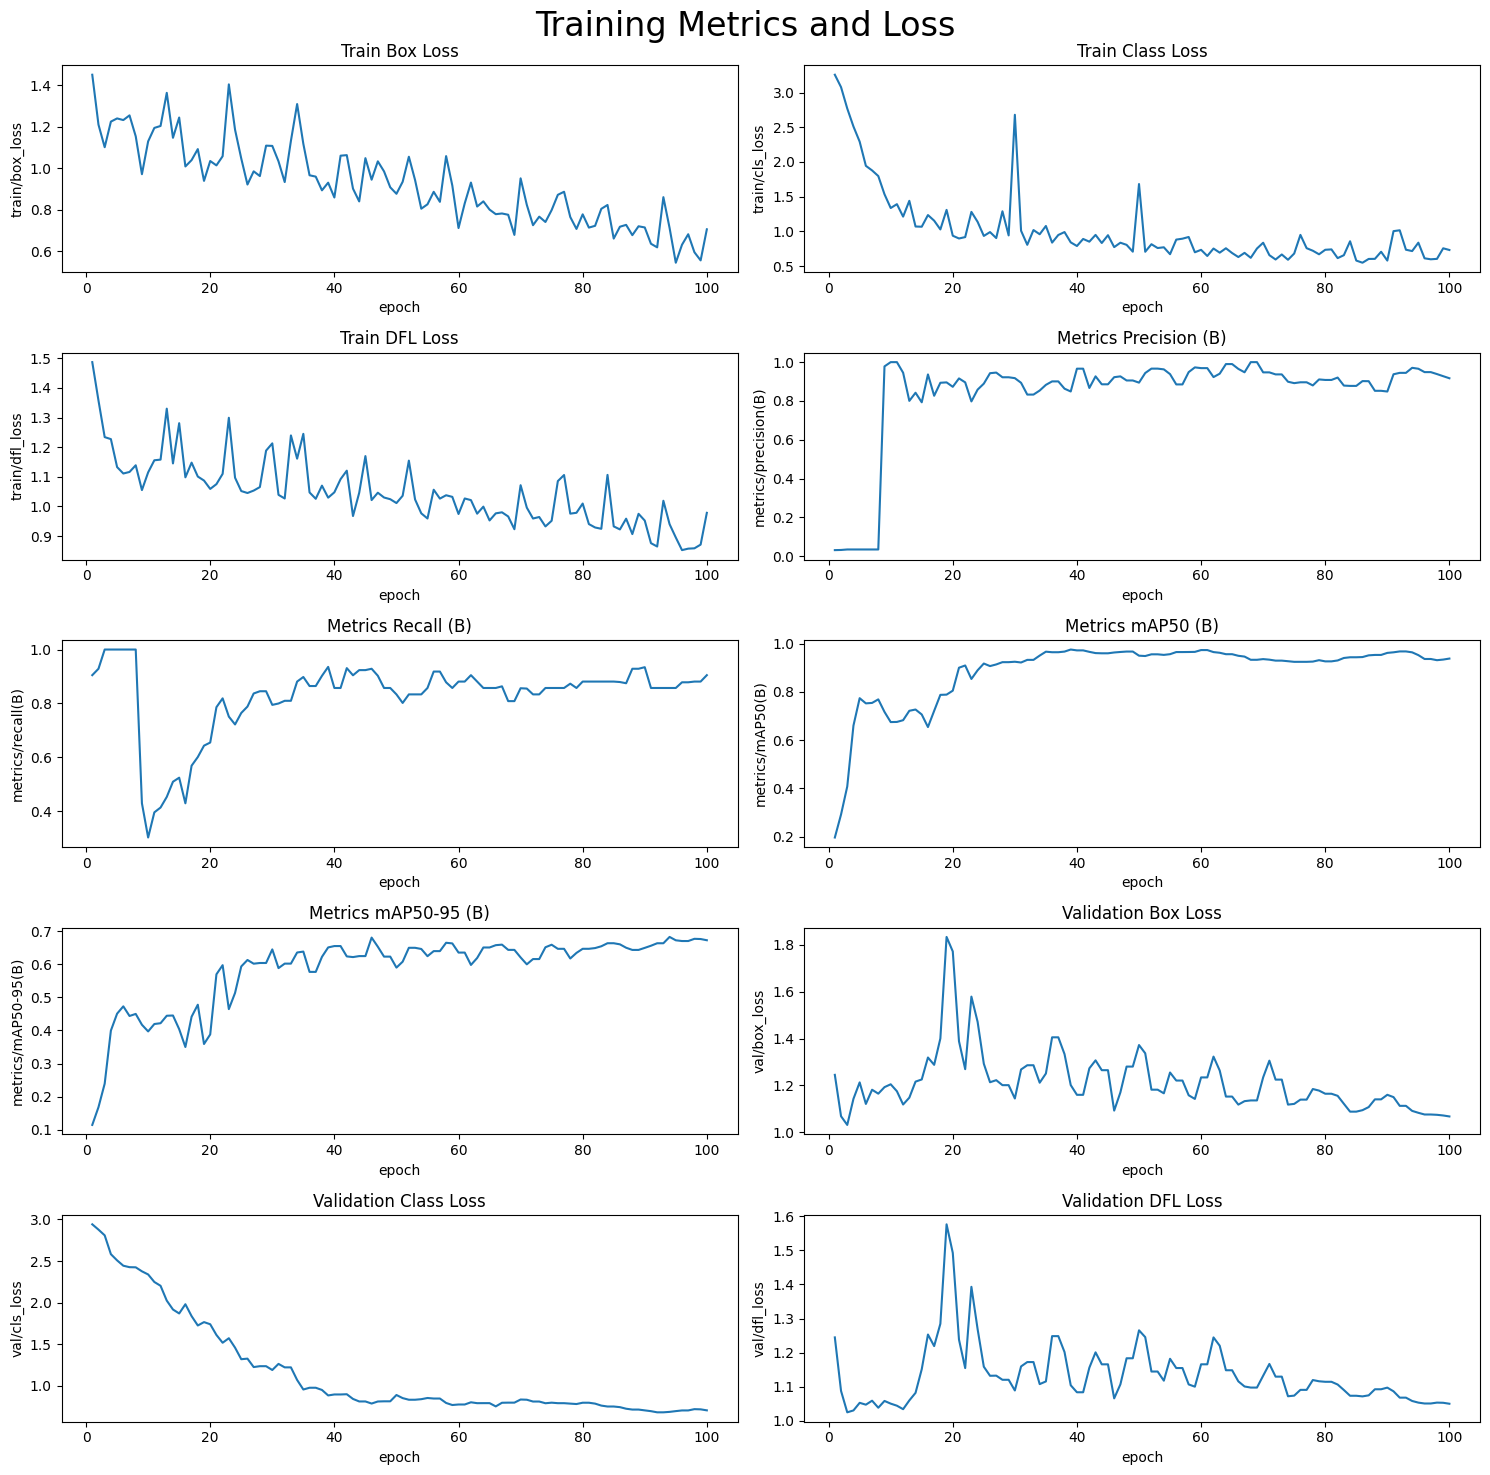

In [4]:
import pandas as pd
import seaborn as sns

# read in the results.csv file as a pandas dataframe
df = pd.read_csv('runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Evaluation

In [9]:
# Loading the best performing model
model = YOLO('runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.140  Python-3.12.9 torch-2.7.0+cpu CPU (AMD Ryzen 5 4600H with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 567.9543.4 MB/s, size: 114.2 KB)


val: Scanning C:\Users\chun\Desktop\_Git\VEnv_YOLO\_Inputs\strawberry\test\labels.cache... 4 images, 0 backgrounds, 0 c
C:\Users\chun\Desktop\_Git\VEnv_YOLO\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          4         23          1      0.911      0.955      0.696
Speed: 1.1ms preprocess, 46.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val2


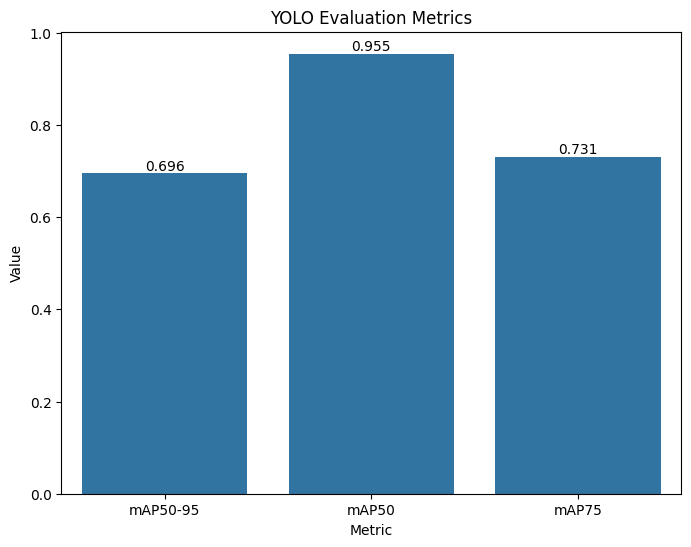

In [10]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

## Confusion Matrix

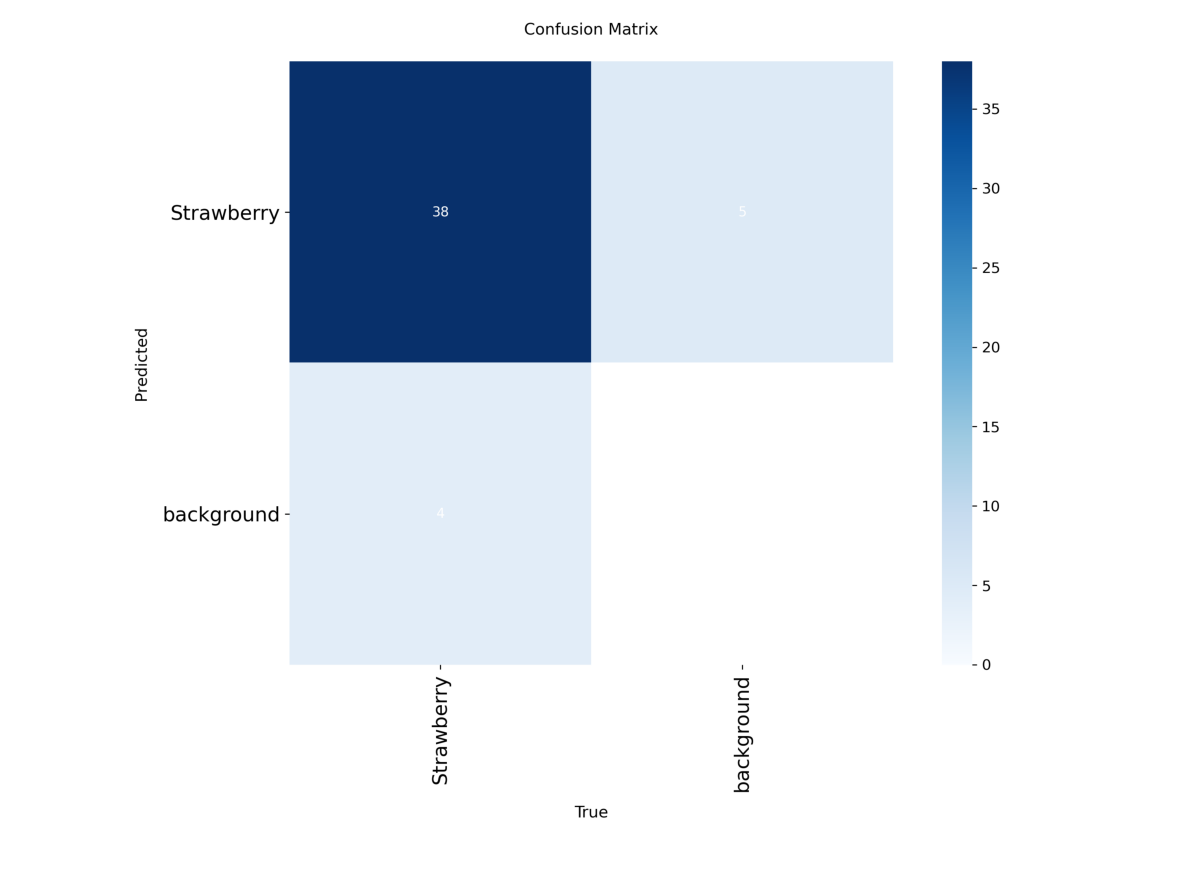

In [14]:
%matplotlib inline

import matplotlib.image as mpimg

# Reading the confusion matrix image file
img = mpimg.imread('runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

# Make Predictions on Test Images

In [20]:
#Function to perform ship detections
def detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 480x640 11 Strawberrys, 74.1ms
Speed: 2.5ms preprocess, 74.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 4 Strawberrys, 62.4ms
Speed: 1.7ms preprocess, 62.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 3 Strawberrys, 61.2ms
Speed: 2.4ms preprocess, 61.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 6 Strawberrys, 60.2ms
Speed: 1.4ms preprocess, 60.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


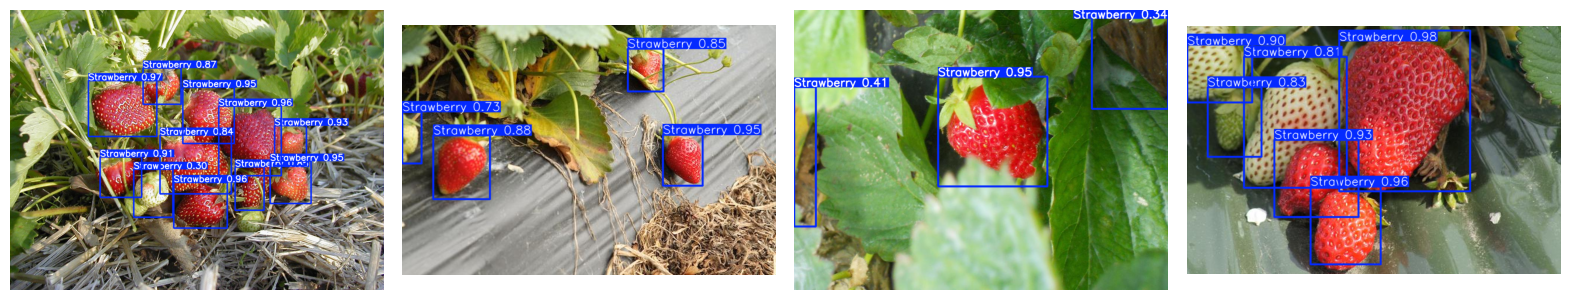

In [21]:
# Get the list of image files in the directory
test_files = os.listdir(test_images)

# Create a figure with subplots in 1 row (and as many columns as images)
fig, axes = plt.subplots(nrows=1, ncols=len(test_files), figsize=(20, 5))  # Adjust figsize as needed

# Iterate over the selected images and plot each one
for i, img_file in enumerate(test_files):
    # Load the current image and run object detection
    img_path = os.path.join(test_images, img_file)
    detect_img = detect(img_path)  # Ensure you have a `detect()` function defined
    
    # Plot the current image on the appropriate subplot
    axes[i].imshow(detect_img)
    axes[i].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()